<a href="https://colab.research.google.com/github/GodoyLucas/XPE/blob/main/DESF5%20-%20Desafio%20Final/notebooks/B1DESF5_Desafio_Final_Enunciado_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import json
from pandas import json_normalize

In [2]:
dados_clientes = pd.read_json("https://raw.githubusercontent.com/GodoyLucas/XPE/main/DESF5%20-%20Desafio%20Final/datasets/clientes.json", orient='columns')
clientes = pd.json_normalize(dados_clientes.cliente)
clientes

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes
0,1,1,26,2,3,13,0,1
1,2,1,58,0,2,2,0,0
2,3,1,63,1,3,11,1,1
3,4,1,58,2,2,11,1,1
4,5,0,70,0,1,5,0,1
...,...,...,...,...,...,...,...,...
2995,2996,1,63,1,2,12,0,1
2996,2997,1,35,0,2,7,0,0
2997,2998,1,35,2,0,11,0,0
2998,2999,1,20,0,0,20,1,0


In [3]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   cod_cliente   3000 non-null   int64
 1   sexo          3000 non-null   int64
 2   idade         3000 non-null   int64
 3   qtd_filhos    3000 non-null   int64
 4   estado_civil  3000 non-null   int64
 5   cod_estado    3000 non-null   int64
 6   hipertenso    3000 non-null   int64
 7   diabetes      3000 non-null   int64
dtypes: int64(8)
memory usage: 187.6 KB


In [4]:
clientes.describe()

,cod_cliente,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000
mean,1500.500000,0.498000,46.548333,1.521000,1.49700,13.819000,0.498000,0.507667
std,866.169729,0.500079,16.616629,1.118321,1.09684,7.786085,0.500079,0.500025
min,1.000000,0.000000,18.000000,0.000000,0.00000,1.000000,0.000000,0.000000
25%,750.750000,0.000000,32.000000,1.000000,1.00000,7.000000,0.000000,0.000000
50%,1500.500000,0.000000,47.000000,2.000000,1.00000,14.000000,0.000000,1.000000
75%,2250.250000,1.000000,61.000000,3.000000,2.00000,20.000000,1.000000,1.000000
max,3000.000000,1.000000,75.000000,3.000000,3.00000,27.000000,1.000000,1.000000


In [5]:
dados_compras = pd.read_excel("https://github.com/GodoyLucas/XPE/blob/main/DESF5%20-%20Desafio%20Final/datasets/compras.xls?raw=true")

In [6]:
dados_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_cliente         3000 non-null   int64  
 1   cod_produto         2990 non-null   float64
 2   qtd_produto         3000 non-null   int64  
 3   valor_unitario      2995 non-null   float64
 4   valor_total_compra  2979 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 117.3 KB


In [7]:
dados_compras.describe()

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra
count,3000.000000,2990.000000,3000.000000,2995.000000,2979.000000
mean,1500.500000,1043.261873,2.507667,8.487830,21.173031
std,866.169729,24.969114,1.119386,10.772478,30.504863
min,1.000000,1000.000000,1.000000,1.250000,1.250000
25%,750.750000,1022.000000,1.000000,3.500000,6.000000
50%,1500.500000,1043.000000,3.000000,4.990000,11.980000
75%,2250.250000,1065.000000,4.000000,8.990000,22.500000
max,3000.000000,1086.000000,4.000000,64.990000,259.960000


In [8]:
dados_compras.loc[dados_compras["valor_total_compra"].isna(), "valor_total_compra"] = dados_compras["qtd_produto"] * dados_compras["valor_unitario"]

In [9]:
dados_compras.loc[dados_compras["valor_unitario"].isna(), "valor_unitario"] = dados_compras["valor_total_compra"] / dados_compras["qtd_produto"]

In [10]:
#def substituir_nulos(group):
#    mais_frequente = group['cod_produto'].value_counts().idxmax()
#    group['cod_produto'].fillna(mais_frequente, inplace=True)
#    return group

#dados_compras = dados_compras.groupby('valor_unitario').apply(substituir_nulos)

In [11]:
dados_compras.dropna(subset=['cod_produto'], inplace=True)

In [12]:
dados_compras['cod_produto'] = dados_compras['cod_produto'].astype('int')

In [13]:
dados_compras.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2990 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_cliente         2990 non-null   int64  
 1   cod_produto         2990 non-null   int64  
 2   qtd_produto         2990 non-null   int64  
 3   valor_unitario      2990 non-null   float64
 4   valor_total_compra  2990 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 140.2 KB


In [14]:
dados_compras

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra
0,1,1011,3,5.99,17.97
1,2,1032,4,9.99,39.96
2,3,1049,2,5.99,11.98
3,4,1021,4,3.99,15.96
4,5,1001,4,22.00,88.00
...,...,...,...,...,...
2995,2996,1046,4,4.99,19.96
2996,2997,1021,1,3.99,3.99
2997,2998,1075,4,35.00,140.00
2998,2999,1002,3,1.99,5.97


In [15]:
dados_compras.describe()

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra
count,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000
mean,1502.530435,1043.261873,2.510368,8.486793,21.130284
std,866.892101,24.969114,1.118771,10.779151,30.432766
min,1.000000,1000.000000,1.000000,1.250000,1.250000
25%,748.250000,1022.000000,2.000000,3.500000,6.000000
50%,1505.500000,1043.000000,3.000000,4.990000,11.980000
75%,2252.750000,1065.000000,4.000000,8.990000,22.500000
max,3000.000000,1086.000000,4.000000,64.990000,259.960000


In [16]:
dados_estados = pd.read_csv("https://github.com/GodoyLucas/XPE/blob/main/DESF5%20-%20Desafio%20Final/datasets/estados.txt?raw=true", encoding='latin-1', sep='|')
dados_estados

,codigo_estado,nome_estado,sgl_estado
0,1,Acre,AC
1,2,Alagoas,AL
2,3,Amapá,AP
3,4,Amazonas,AM
4,5,Bahia,BA
5,6,Ceará,CE
6,7,Distrito Federal,DF
7,8,Espírito Santo,ES
8,9,Goiás,GO
9,10,Maranhão,MA


In [17]:
import requests
from bs4 import BeautifulSoup
import re

In [18]:
r = requests.get("https://profleandrolessa.wordpress.com/exercicio-de-coleta-de-dados/")

soup = BeautifulSoup(r.text, 'html.parser')

dados_produtos = soup.find_all("tr")

registros = []

for i in range(len(dados_produtos)):
  passo0 = str(dados_produtos[i])
  passo1 = re.split('<tr><td>', passo0)
  passo2 = re.split('</td></tr>', passo1[1])
  passo3 = re.split('</td><td>', passo2[0])
  registros.append(passo3)

produtos = pd.DataFrame(columns=registros[0], data = registros[1:])
produtos

,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor
0,1000,Sabão em pó,1,Produtos de Limpeza,"9,9"
1,1001,Amaciante,1,Produtos de Limpeza,22
2,1002,Detergente,1,Produtos de Limpeza,"1,99"
3,1003,Água sanitária,1,Produtos de Limpeza,12
4,1004,Esponja de aço,1,Produtos de Limpeza,4
...,...,...,...,...,...
82,1082,Peixe,5,Carnes e Frios,"29,99"
83,1083,Frango,5,Carnes e Frios,"1,99"
84,1084,Carne vermelha,5,Carnes e Frios,"56,99"
85,1085,Carne seca,5,Carnes e Frios,"64,99"


In [19]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cod_produto         87 non-null     object
 1   nome_produto        87 non-null     object
 2   cod_classe_produto  87 non-null     object
 3   classe_produto      87 non-null     object
 4   valor               87 non-null     object
dtypes: object(5)
memory usage: 3.5+ KB


In [20]:
produtos['valor'] = produtos['valor'].str.replace(',', '.')

In [21]:
produtos['cod_produto'] = produtos['cod_produto'].astype('int')
produtos['nome_produto'] = produtos['nome_produto'].astype('str')
produtos['cod_classe_produto'] = produtos['cod_classe_produto'].astype('int')
produtos['classe_produto'] = produtos['classe_produto'].astype('str')
produtos['valor'] = produtos['valor'].astype('float')


In [22]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_produto         87 non-null     int64  
 1   nome_produto        87 non-null     object 
 2   cod_classe_produto  87 non-null     int64  
 3   classe_produto      87 non-null     object 
 4   valor               87 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.5+ KB


In [23]:
produtos

,cod_produto,nome_produto,cod_classe_produto,classe_produto,valor
0,1000,Sabão em pó,1,Produtos de Limpeza,9.90
1,1001,Amaciante,1,Produtos de Limpeza,22.00
2,1002,Detergente,1,Produtos de Limpeza,1.99
3,1003,Água sanitária,1,Produtos de Limpeza,12.00
4,1004,Esponja de aço,1,Produtos de Limpeza,4.00
...,...,...,...,...,...
82,1082,Peixe,5,Carnes e Frios,29.99
83,1083,Frango,5,Carnes e Frios,1.99
84,1084,Carne vermelha,5,Carnes e Frios,56.99
85,1085,Carne seca,5,Carnes e Frios,64.99


In [24]:
dados_compras_produtos = dados_compras.merge(produtos[['cod_produto', 'valor']], on='cod_produto')
dados_compras_produtos[['cod_produto', 'valor_unitario', 'valor']]

,cod_produto,valor_unitario,valor
0,1011,5.99,5.99
1,1011,5.99,5.99
2,1011,5.99,5.99
3,1011,5.99,5.99
4,1011,5.99,5.99
...,...,...,...
2985,1015,12.00,12.00
2986,1015,12.00,12.00
2987,1015,12.00,12.00
2988,1015,12.00,12.00


In [25]:
dados_compras_produtos['diff'] = dados_compras_produtos.valor_unitario - dados_compras_produtos.valor

In [26]:
dados_compras_produtos.query('diff != 0')

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra,valor,diff


In [27]:
df_tratado = pd.merge(dados_compras, clientes, how = 'inner', on = 'cod_cliente')

In [28]:
df_tratado

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes
0,1,1011,3,5.99,17.97,1,26,2,3,13,0,1
1,2,1032,4,9.99,39.96,1,58,0,2,2,0,0
2,3,1049,2,5.99,11.98,1,63,1,3,11,1,1
3,4,1021,4,3.99,15.96,1,58,2,2,11,1,1
4,5,1001,4,22.00,88.00,0,70,0,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2996,1046,4,4.99,19.96,1,63,1,2,12,0,1
2986,2997,1021,1,3.99,3.99,1,35,0,2,7,0,0
2987,2998,1075,4,35.00,140.00,1,35,2,0,11,0,0
2988,2999,1002,3,1.99,5.97,1,20,0,0,20,1,0


In [29]:
from sklearn.cluster import KMeans

for i in range(1, 11):

  kmeans = KMeans(n_clusters = i, random_state=0, n_init=10)
  kmeans.fit(X=df_tratado[['idade', 'valor_total_compra']])
  print("k = ", i, ": ",kmeans.inertia_)

k =  1 :  3594146.3889058544
k =  2 :  1665877.0056578135
k =  3 :  1077628.4135660413
k =  4 :  724846.9305424874
k =  5 :  533118.5850935788
k =  6 :  442353.22539955506
k =  7 :  378911.9084614109
k =  8 :  332278.12607532105
k =  9 :  304611.2308148909
k =  10 :  272074.7956325874


In [30]:
k = 4

kmeans_clientes = KMeans(n_clusters=k, random_state=0, n_init=10)
df_tratado['cluster'] = kmeans_clientes.fit_predict(df_tratado[['idade', 'valor_total_compra']])

centroides_clusters = kmeans_clientes.cluster_centers_

import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

grafico = px.scatter(x = df_tratado['idade'],
                     y = df_tratado['valor_total_compra'],
                     color = df_tratado['cluster'])

grafico_centroide = px.scatter(x=centroides_clusters[:,0],
                               y=centroides_clusters[:,1],
                               size = [7,7,7,7])

grafico_final = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final.show()

In [31]:
df_tratado.loc[df_tratado['cluster']==0, 'nome_cluster'] = 'Mais Velhos que gastaram pouco'
df_tratado.loc[df_tratado['cluster']==1, 'nome_cluster'] = 'Os que gastaram mais'
df_tratado.loc[df_tratado['cluster']==2, 'nome_cluster'] = 'Mais novos que gastaram pouco'
df_tratado.loc[df_tratado['cluster']==3, 'nome_cluster'] = 'Os que tiveram gastos medianos'

2) Qual é o desvio padrão dos valores de produtos do dataset de produtos do cuja classe do alimento é Carnes e Frios?

In [32]:
produtos.query('classe_produto == "Carnes e Frios"').valor.std()

20.717761959392732

3) Construa um histograma de distribuição de idades das pessoas que são hipertensas e que realizaram compra de produtos da classe "Carnes e Frios". Considere um gráfico de barras com 20 colunas.

In [33]:
df_tratado = pd.merge(df_tratado, produtos, how = 'left', on = 'cod_produto')
df_tratado

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes,cluster,nome_cluster,nome_produto,cod_classe_produto,classe_produto,valor
0,1,1011,3,5.99,17.97,1,26,2,3,13,0,1,2,Mais novos que gastaram pouco,Lustra móveis,1,Produtos de Limpeza,5.99
1,2,1032,4,9.99,39.96,1,58,0,2,2,0,0,0,Mais Velhos que gastaram pouco,Café,3,Alimentação,9.99
2,3,1049,2,5.99,11.98,1,63,1,3,11,1,1,0,Mais Velhos que gastaram pouco,Leite em pó,3,Alimentação,5.99
3,4,1021,4,3.99,15.96,1,58,2,2,11,1,1,0,Mais Velhos que gastaram pouco,Leite integral litro,2,Bebidas,3.99
4,5,1001,4,22.00,88.00,0,70,0,1,5,0,1,3,Os que tiveram gastos medianos,Amaciante,1,Produtos de Limpeza,22.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2996,1046,4,4.99,19.96,1,63,1,2,12,0,1,0,Mais Velhos que gastaram pouco,Goiabada,3,Alimentação,4.99
2986,2997,1021,1,3.99,3.99,1,35,0,2,7,0,0,2,Mais novos que gastaram pouco,Leite integral litro,2,Bebidas,3.99
2987,2998,1075,4,35.00,140.00,1,35,2,0,11,0,0,1,Os que gastaram mais,Queijo Minas,5,Carnes e Frios,35.00
2988,2999,1002,3,1.99,5.97,1,20,0,0,20,1,0,2,Mais novos que gastaram pouco,Detergente,1,Produtos de Limpeza,1.99


In [34]:
df_tratado.query('hipertenso == 1 and classe_produto == "Carnes e Frios"')

,cod_cliente,cod_produto,qtd_produto,valor_unitario,valor_total_compra,sexo,idade,qtd_filhos,estado_civil,cod_estado,hipertenso,diabetes,cluster,nome_cluster,nome_produto,cod_classe_produto,classe_produto,valor
15,16,1085,4,64.99,259.96,0,40,1,2,1,1,1,1,Os que gastaram mais,Carne seca,5,Carnes e Frios,64.99
17,18,1079,4,5.99,23.96,0,35,0,2,8,1,1,2,Mais novos que gastaram pouco,Margarina,5,Carnes e Frios,5.99
19,20,1077,2,34.50,69.00,1,31,3,3,2,1,0,3,Os que tiveram gastos medianos,Queijo outros,5,Carnes e Frios,34.50
52,53,1078,4,10.99,43.96,0,20,1,2,26,1,0,2,Mais novos que gastaram pouco,Manteiga,5,Carnes e Frios,10.99
97,98,1086,2,15.90,31.80,0,26,0,1,6,1,1,2,Mais novos que gastaram pouco,Salsicha,5,Carnes e Frios,15.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,2910,1084,1,56.99,56.99,1,22,0,3,2,1,1,3,Os que tiveram gastos medianos,Carne vermelha,5,Carnes e Frios,56.99
2901,2912,1077,1,34.50,34.50,0,40,1,3,24,1,0,2,Mais novos que gastaram pouco,Queijo outros,5,Carnes e Frios,34.50
2910,2921,1081,4,11.50,46.00,1,62,0,0,3,1,1,3,Os que tiveram gastos medianos,Presunto,5,Carnes e Frios,11.50
2941,2952,1083,3,1.99,5.97,0,41,2,2,6,1,0,2,Mais novos que gastaram pouco,Frango,5,Carnes e Frios,1.99


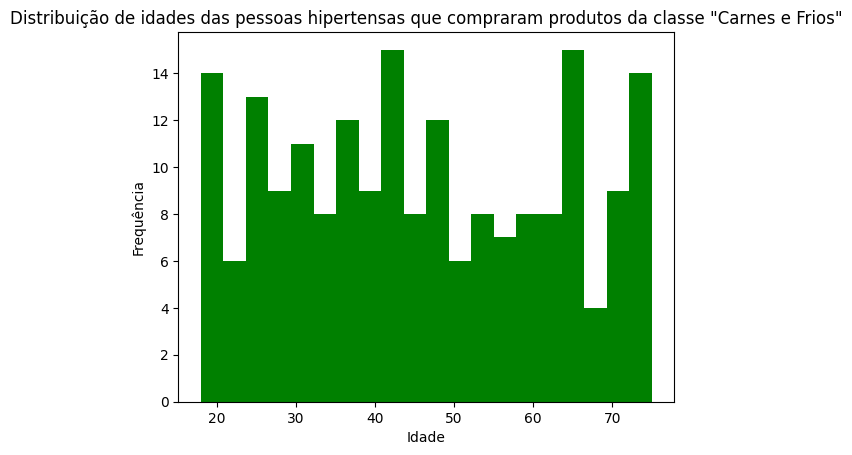

In [35]:
import matplotlib.pyplot as plt

# Filtrando as pessoas hipertensas que compraram produtos da classe "Carnes e Frios"
filtro = (df_tratado['hipertenso'] == 1) & (df_tratado['classe_produto'] == 'Carnes e Frios')
dados_filtrados = df_tratado.loc[filtro, ['idade']]

# Plotando o histograma com 20 colunas
plt.hist(dados_filtrados['idade'], bins=20, color='green')

# Configurando o título e os rótulos dos eixos
plt.title('Distribuição de idades das pessoas hipertensas que compraram produtos da classe "Carnes e Frios"')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.show()


4) Após aplicar o algoritmo de agrupamento, reponda: Quantos registros estão presentes no cluster de número 0?

In [36]:
df_tratado['cluster'].value_counts()

0    1361
2    1348
3     221
1      60
Name: cluster, dtype: int64

5) Qual a proporção de homens e mulheres hipertensos que compraram produtos da classe "Alimentação"?

In [37]:
df_filtrado = df_tratado.query("classe_produto == 'Alimentação' and hipertenso == 1")

homens_filtrados = df_filtrado.query("sexo == 1").sexo.count()
mulheres_filtradas = df_filtrado.query("sexo == 0").sexo.count()

total = homens_filtrados + mulheres_filtradas

proporcao_homem = (homens_filtrados / total) * 100
proporcao_mulher = (mulheres_filtradas / total) * 100

print("proporcao_homem = ", proporcao_homem.round(2))
print("proporcao_mulher = ", proporcao_mulher.round(2))

proporcao_homem =  50.48
proporcao_mulher =  49.52


6) Gere o gráfico de análise de clusters com centroides e selecione a opção que representa a imagem gerada

In [38]:
grafico_final.show()

7) Após aplicar o algoritmo de agrupamento, gere uma estatística com describe da variável valor_total_compra agrupando os resultados por cluster e responda a alternativa CORRETA

In [39]:
df_tratado.query("cluster == 0").valor_total_compra.describe()

count    1361.000000
mean       12.886201
std         9.184338
min         1.250000
25%         5.990000
50%        10.990000
75%        17.000000
max        48.000000
Name: valor_total_compra, dtype: float64

In [40]:
df_tratado.query("cluster == 1").valor_total_compra.describe()

count     60.000000
mean     180.426167
std       40.550644
min      129.980000
25%      140.000000
50%      170.970000
75%      194.970000
max      259.960000
Name: valor_total_compra, dtype: float64

In [41]:
df_tratado.query("cluster == 2").valor_total_compra.describe()

count    1348.000000
mean       13.705200
std         9.822997
min         1.250000
25%         5.990000
50%        11.960000
75%        17.980000
max        48.000000
Name: valor_total_compra, dtype: float64

In [42]:
df_tratado.query("cluster == 3").valor_total_compra.describe()

count    221.000000
mean      73.942308
std       23.436634
min       43.960000
25%       54.000000
50%       66.000000
75%       89.970000
max      119.960000
Name: valor_total_compra, dtype: float64

8) Assinale a alternativa que apresenta o resultado do diagrama de boxplot entre as variáveis quantidade de filhos e cluster

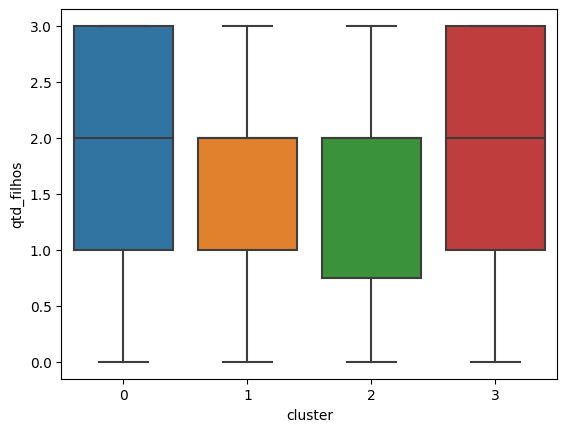

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='cluster', y='qtd_filhos', data=df_tratado)
plt.show()

9) Quantidade de solteiros e não hipertensos no cluster 3?????????? N tenho certeza se a questão é essa!!!!!!!!!

In [44]:
qtd_solteiros_nao_hipertensos = df_tratado.query("cluster == 3 and estado_civil == 0 and hipertenso == 0").shape[0]
print(qtd_solteiros_nao_hipertensos)


20


10) 